In [88]:
# import libraries
import pandas as pd

In [89]:
# Load the dataset
df = pd.read_csv('twitter.csv')

# Inspect the first few rows
df.head()

,id,entity,sentiment,tweet_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [90]:
# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
df.isnull().sum()

# Optional: Remove rows with missing sentiment or tweet text
df = df.dropna(subset=['sentiment', 'tweet_text'])


C:\Users\Rasagna\AppData\Local\Temp\ipykernel_22620\1357708898.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


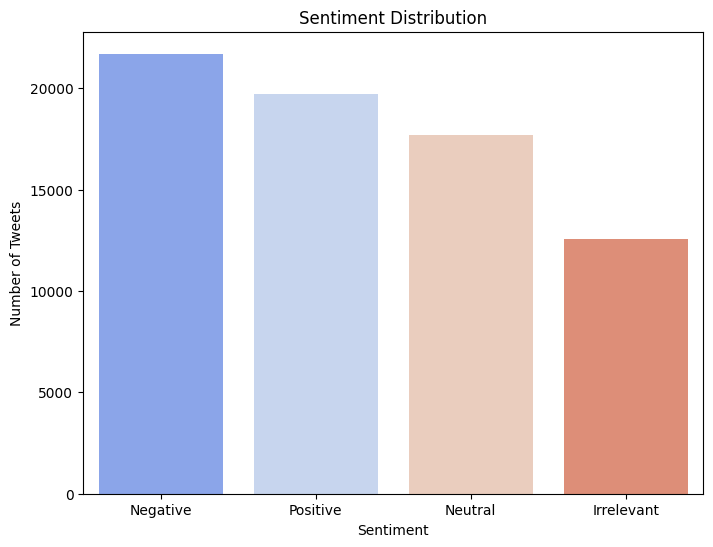

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the sentiment occurrences
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


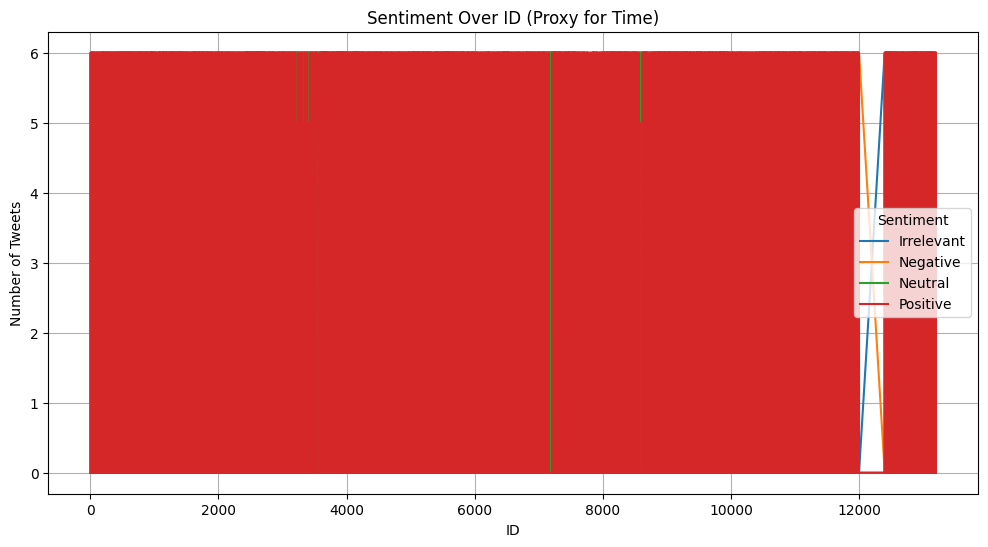

In [92]:
# Group by 'id' and sentiment, then count the number of tweets
sentiment_time = df.groupby([df['id'], 'sentiment']).size().unstack().fillna(0)

# Plot sentiment over 'id' (used as a proxy for time)
plt.figure(figsize=(12, 6))
for sentiment in sentiment_time.columns:
    plt.plot(sentiment_time.index, sentiment_time[sentiment], label=sentiment)

plt.title("Sentiment Over ID (Proxy for Time)")
plt.xlabel("ID")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

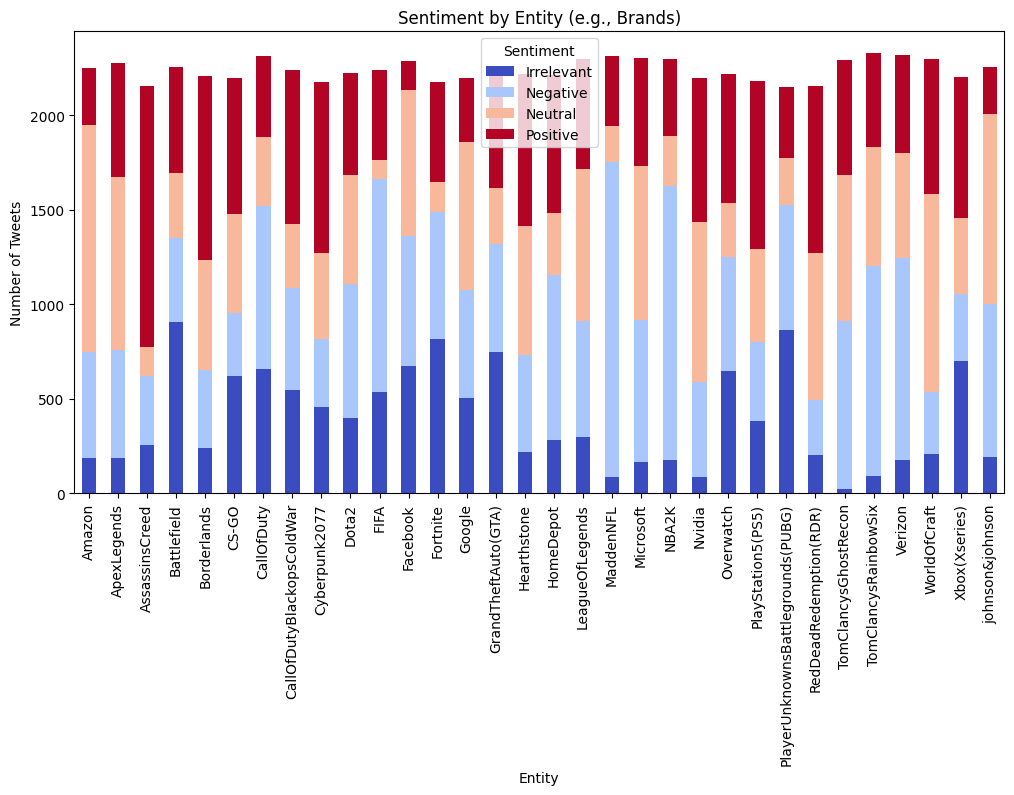

In [93]:
# Group by entity and sentiment, then count the number of tweets
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)

# Plot sentiment by entity
plt.figure(figsize=(12, 8))
entity_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title("Sentiment by Entity (e.g., Brands)")
plt.xlabel("Entity")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=90)
plt.legend(title="Sentiment")
plt.show()


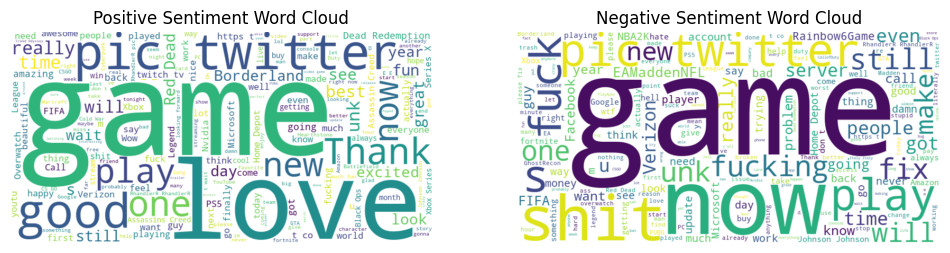

In [94]:
from wordcloud import WordCloud

# Filter positive and negative tweets
positive_tweets = ' '.join(df[df['sentiment'] == 'Positive']['tweet_text'])
negative_tweets = ' '.join(df[df['sentiment'] == 'Negative']['tweet_text'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_tweets)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")

plt.show()
